# Исследование рынка видеоигр

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Перед вами данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation) до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года (данные за 2016 год могут быть неполными).

Небольшая сводка информации о данных в таблице:

- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.



**Цель исследования:**
1. Выявить определяющие успешность игры закономерности
2. Составить портрет пользователя в каждом регионе

**Ход исследования:**
Для начала надо получить данные из файла `/datasets/games.csv`. Известно, что данные за 2016 год могут быть неполными, поэтому перед началом исследования необходимо провести обзор данных и предобработку. 

Я планирую проверить данные на наличие различного рода ошибок, а также оценю их влияние на исследование - пропуски, дубликаты (явные и неявные), неверный тип данных, а также аномальные значения (выбросы) в данных. После этого я поищу возможность исправить ошибки, которые не приведут к искажению конечного результата. Далее будут добавлены необходимые для исследования столбцы в таблице и я смогу приступить к исследовательскому анализу данных. 

На этапе исследовательского анализа данных будет выбран **актуальный период**, на основе которого и будет строиться дальнейшее исследование. Также будет проведен анализ жанров - какой характерный срок появления новых и исчезновения старых платформ, выделены потенциально прибыльные платформы. Далее будет рассмотрена зависимость продаж от отзывов пользователей и критиков. После этого будет проанализировано распределение по жанрам, выделены самые успешные и не успешные жанры. 

На основе полученных результатов можно будет составить портрет пользователя в каждом регионе - самые популярные платформы и жанры игр для североамериканского (NA), европейского (EU) и японского (JP) регионов, а также будет определено влияние ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр) на продажи в отдельном регионе.

Следующий этап - Статистический анализ данных. Будут проверены две гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Таким образом исследование пройдет в восемь этапов:
- Обзор данных
- Предобработка данных
- Расчеты и добавление новых столбцов в таблицу
- Определение актуального периода для анализа
- Проведение анализа по платформам и жанрам
- Составление портрета пользователя в каждом регионе
- Проверка гипотез
- Написание общего вывода

## Откройте файл с данными и изучите общую информацию

Для начала произведем импорт всех необходимых для проекта библиотек. Далее сохраним данные из файла в переменной `data` :

In [46]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sb
from scipy import stats as st
from math import factorial as fct

In [47]:
data = pd.read_csv('D:\Загрузки\games.csv')

Рассмотрим общую информацию о таблице с помощью метода `.info()` : 

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


И выведем первые 5 строк таблицы:

In [49]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Рассмотрим общую гистограмму для всех числовых столбцов:

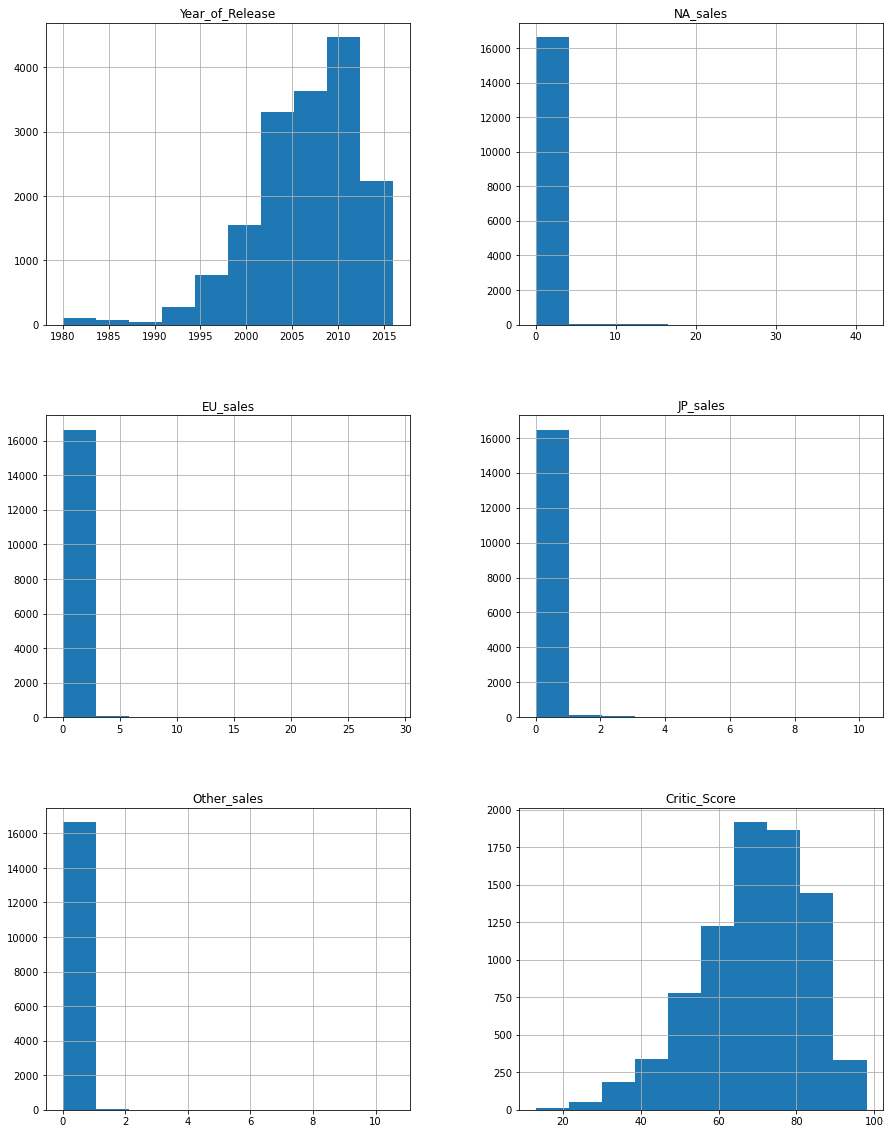

In [50]:
data.hist(figsize=(15, 20));

**Вывод:** В процессе предварительного анализа данных были обнаружены пропуски в некоторых столбцах (как минимум 
Critic_Score,  User_Score и Rating), которые будут обработаны в следующем этапе. Также обнаружены некорректные типы данных для некоторых столбцов (к примеру Year_Of_Release). 

## Предобработка данных

Перед началом предобработки стоит привести названия столбцов к нижнему регистру. Проверим столбцы после приведения:

In [51]:
data.columns = [i.lower() for i in data.columns]
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Также можно заметить что в столбце `user_score` встречается аббревиатура `'tbd'`, которая переводится как `"To be determined" - будет определено`, то есть неизвестное значение. Такие значения считаются пропусками, поэтому лучше будет заменить их на `nan`:

In [52]:
data['user_score'] = data['user_score'].replace('tbd', np.nan)

### Приведение данных к нужному типу

Если взглянуть на информацию о таблице, то можно заметить что некоторые столбцы имеют некорректный тип данных, стоит поменять следующие типы:
- `year_of_release` на `int`, ведь год выпуска - целое число
- `user_score` на `float`, так как это количественные переменные и в будущем потребуется выполнять операции с ними, если оставить тип данных `str`, то это будет невозможно

In [53]:
data['year_of_release'] = pd.to_numeric(data['year_of_release'], errors = 'coerce').astype('int', errors = 'ignore')
data['user_score'] = pd.to_numeric(data['user_score'], errors = 'coerce')

### Поиск и изучение пропущенных значений в таблице

Для начала посмотрим в каких столбцах есть пропуски и сколько их:

In [54]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

Чтобы понять насколько много пропусков, посмотрим на их процент в каждом из столбцов:

In [55]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,2.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.000000
user_score,55.000000


Начнем со столбцов где пропусков совсем мало. Посмотрим на строки где пропущено имя игры:

In [56]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Можно заметить что это всего 2 строки, причем пропуски в жанре допущены также в этих строчках. Проще будет исключить их из общей таблицы, ведь это меньше 1% от всех данных:

In [57]:
data = data.dropna(subset = ['name'])
data.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating             6764
dtype: int64

Пропуски столбца `year_of_release` составляют всего 2% от общего объема, так что их можно тоже исключить!

In [58]:
data = data.dropna(subset = ['year_of_release'])
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

Теперь время для более серьезных пропусков - столбцы `critic_score` и `user_score` . Пропуски в этих столбцах составляют около половины от всех данных, тут уже не обойтись обычным исключением из таблицы, результаты исследования могут сильно исказиться. При этом подставлять конкретные значения рейтингов (допустим среднее/медианное по жанру) будет некорректно, ведь каждая игра уникальна, тогда логичнее всего будет оставить пропуски.

Теперь столбец - `rating`. Так как это категориальная переменная и определить конкретное значение категории для игр не получится, поставим значение `unknown`:

In [59]:
data['rating'] = data['rating'].fillna('unknown')

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


Пропуски были обработаны, поэтому можно приступать к следующему этапу

### Обработка дубликатов

Начнем с явных дубликатов:

In [61]:
data.duplicated().sum()

0

Явных дубликатов в таблице нет, значит время искать неявные дубликаты. У нас есть два столбца где потенциально стоит рассматривать дубликаты - `name` и `genre`. Однако дубликаты в столбце `name` скорее всего точно есть. Ведь игра выходит не обязательно для только одной платформы, а может выйти как на `PC`, так и например на `PS4`. Поэтому будем искать дубликаты только в столбце `genre` :

In [62]:
data['genre'] = data['genre'].str.lower()
data['genre'].unique()

array(['sports', 'platform', 'racing', 'role-playing', 'puzzle', 'misc',
       'shooter', 'simulation', 'action', 'fighting', 'adventure',
       'strategy'], dtype=object)

Все значения оказались не являются дубликатами, поэтому удалять ничего и не нужно!

Дубликаты устранены, так что можем переходить к следующему этапу.

### Добавление нового столбца

Необходимо добавить новый столбец, показывающий суммарные продажи игры по всем регионам. Назовем его `total_sales` : 

In [63]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

### Удаление аномальных значений

Рассмотрим уникальные значения в столбце `user_score` на случай если произошла опечатка и была введена слишком высокая оценка:

In [64]:
data['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

Все значения лежат в промежутке от 0 до 10, что вполне соответствует реальности! Время проверить `critic_score` : 

In [65]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

Данные в полном порядке, можно начинать исследовательский анализ данных!

**Вывод:** В процессе предобработки данных названия столбцов были приведены к нижнему регистру. А все дубликаты и пропуски были по возможности исправлены.

## Исследовательский анализ данных

Изучим данные по выпуску игр в разные годы. Для этого воспользуемся гистограммой:

Text(0, 0.5, 'Объем продаж')

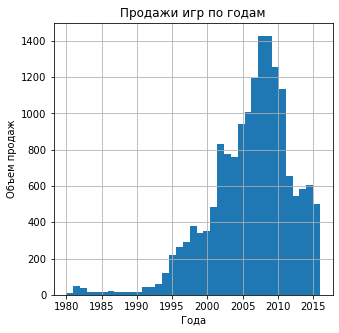

In [66]:
data['year_of_release'].hist(bins = 37, figsize = (5,5)) # 37 - количество лет от начала сбора статистики и до 2016-го
plt.pyplot.title('Продажи игр по годам')
plt.pyplot.xlabel('Года')
plt.pyplot.ylabel('Объем продаж')

Можно заметить, что заметный рост рынка игр начинается примерно в 1990-м году, а активный рост с 2000 года. Объяснить это можно тем, что примерно в эти годы активным развитием компьютеров - увеличивались производительные множества, улучшался интерфейс и тд. Все это давало разработчикам больше возможностей реализовать свои идеи в играх. Также можно заметить, что после ~2010 года происходит резкий спад. Скорее всего это можно объяснить появлением рынка мобильных игр, статистика по которым не входит в исследуемые данные. Тогда рынок игр сместился в мобильный сегмент и из-за этого произошел спад.

Посмотрим, какие платформы имели наибольший общий тираж выпущенных игр:

Text(0, 0.5, 'Объем продаж')

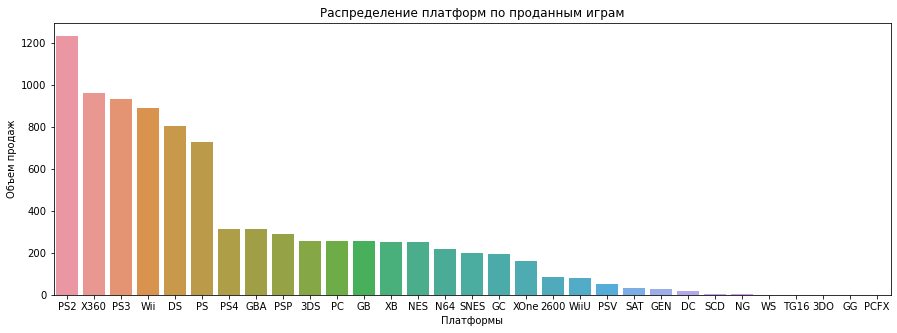

In [67]:
top_platform = (data.
                pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').
                sort_values(by = 'total_sales', ascending = False)
                )
plt.pyplot.figure(figsize = (15,5))
plt.pyplot.title('Распределение платформ по проданным играм')
sb.barplot(x = top_platform.index, y = top_platform['total_sales'])
plt.pyplot.xlabel('Платформы')
plt.pyplot.ylabel('Объем продаж')


Теперь для каждой платформы построим распределение общих продаж по годам:

D:\anaconda\lib\site-packages\pandas\plotting\_matplotlib\core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


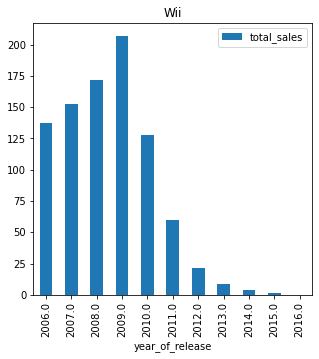

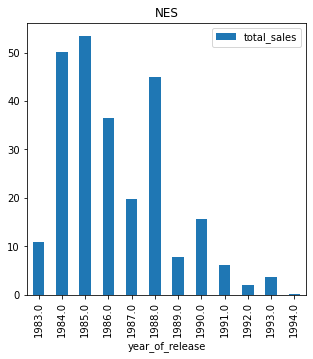

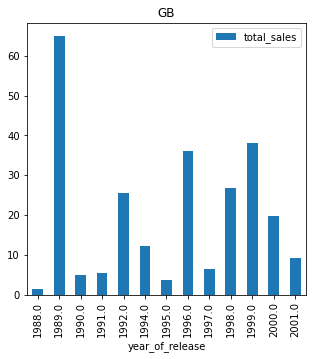

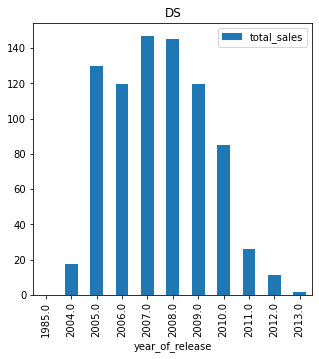

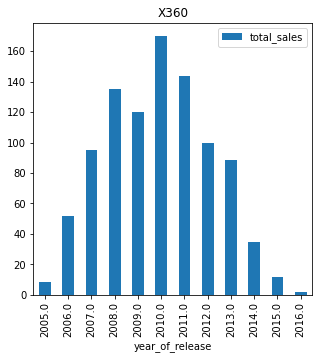

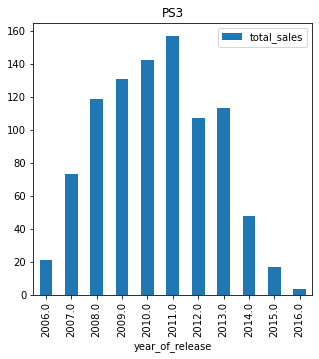

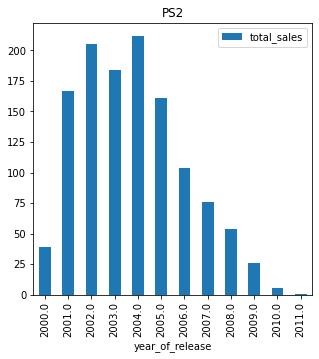

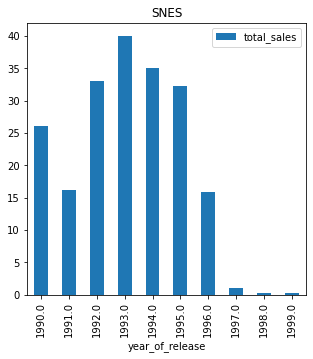

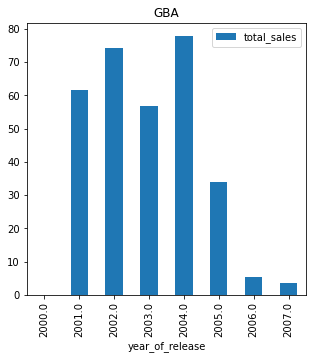

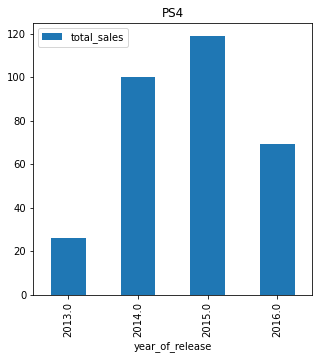

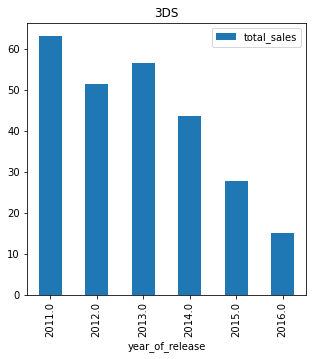

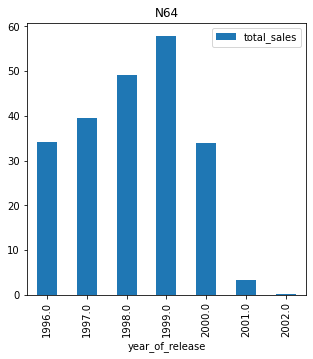

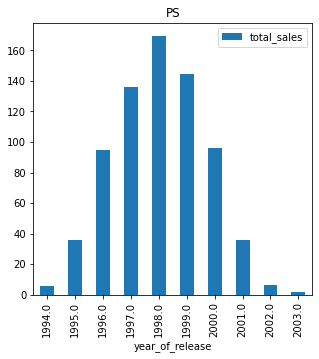

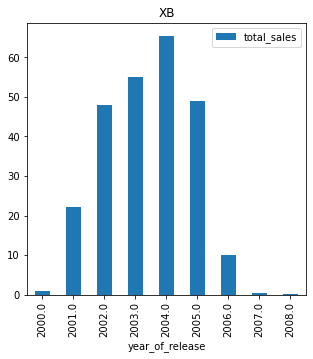

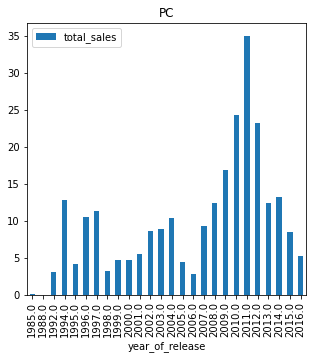

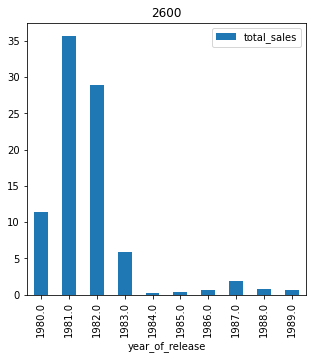

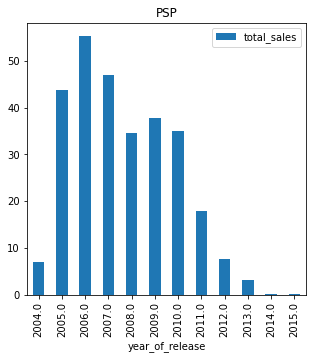

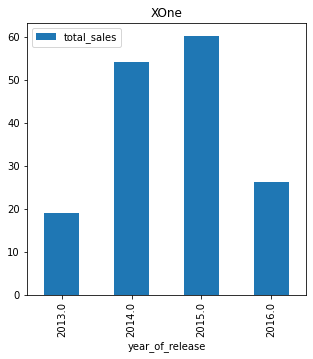

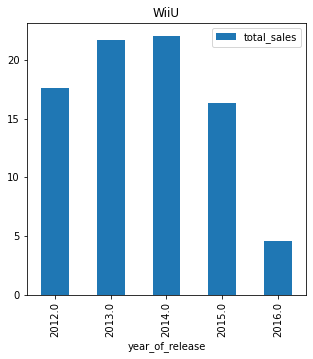

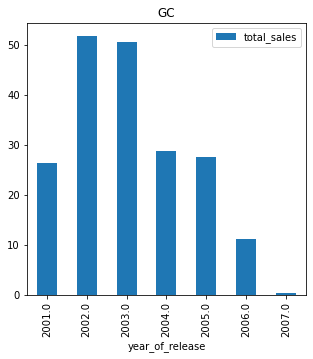

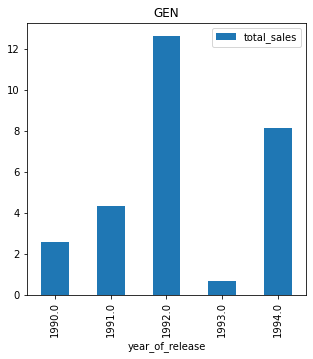

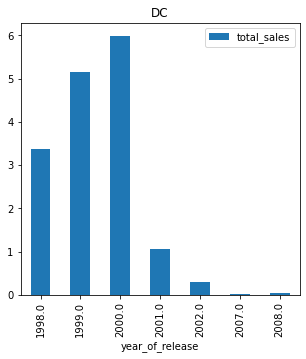

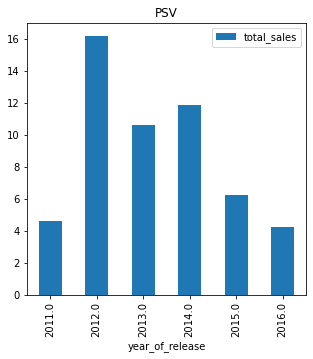

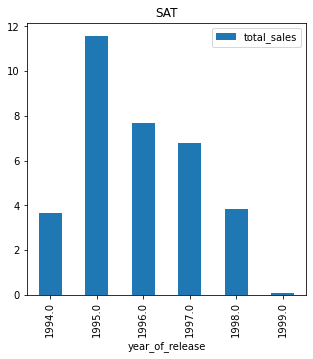

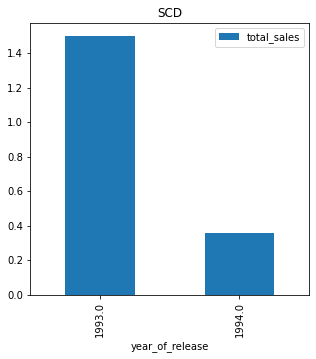

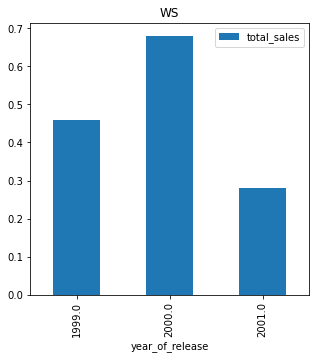

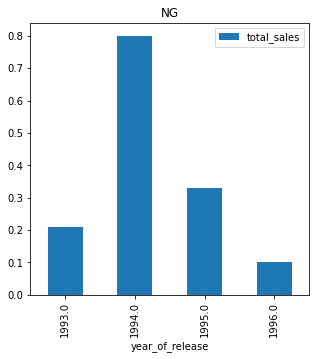

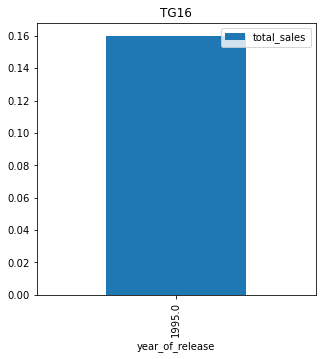

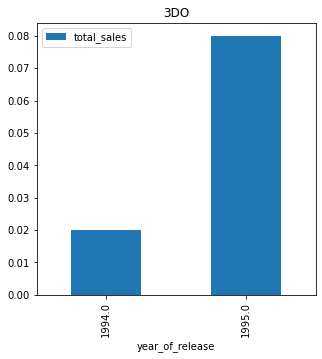

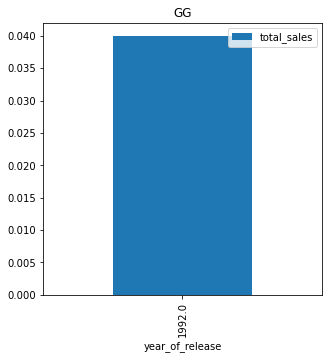

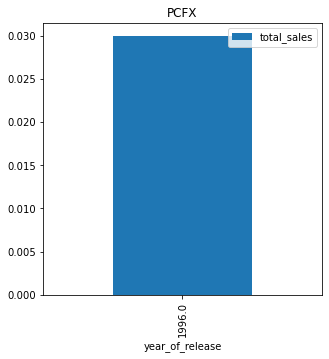

In [68]:
for i in data['platform'].unique():   
    (data[data['platform'] == i].
     pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum').
     plot(title = i, figsize = (5,5), kind = 'bar')
    )

Выделим 5 наиболее успешных платформ:

In [69]:
top_platform.head()

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78


Можно заметить, что каждая платформа имеет среднее "время жизни" (промежуток за который она успевает появиться, набрать популярность, а потом стать невостребованной) около 8 - 10 лет. 

С учетом проведенного анализа в актуальный период будут включены игры выпущенные в 2010 году или позднее. Период выбран как условная третья стадия развития рынка игр. Первая стадия - самое начало, игр выпускается мало, компьютеры слабые. Вторая стадия - активный рост индустрии игры, продажи растут. Третий период - появление мобильного рынка, спад в продажах игр для ПК и консолей. Так как данные за 1 и 2 период не отражают существующей ситуации, то и в актуальный период они не войдут. При этом надо учесть что в 2010 году имели развитие платформы которые сейчас уже не актуальны, поэтому разумно будет начинать актуальный период с 2014 года.

In [70]:
data_actual = data.query('year_of_release >= 2014')

### Анализ рынка по платформам и жанрам

Ответим на следующий вопрос: "Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ."

Для ответа для начала нужно немного изменить нашу статистику по платформам. Очевидно, что из всех 20 платформ некоторые к 2010 году стали полностью неактуальны (т.е. игры на них не выходят с 2010 года или ранее). Поэтому обновим наше распределение по платформам из новой таблицы `data_actual` : 

Text(0, 0.5, 'Объем продаж')

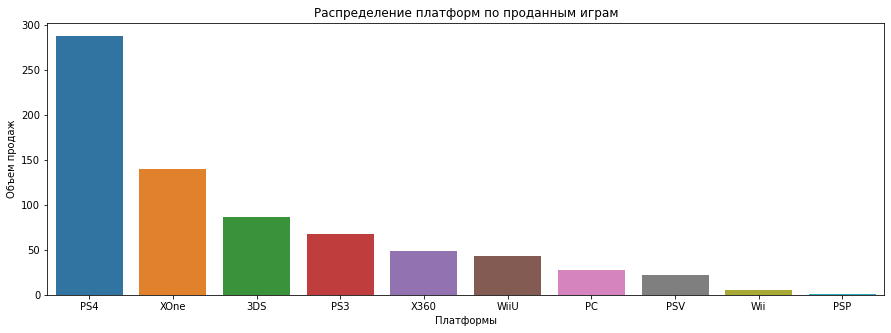

In [71]:
top_platform = (data_actual.
                pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').
                sort_values(by = 'total_sales', ascending = False)
                )
plt.pyplot.figure(figsize = (15,5))
plt.pyplot.title('Распределение платформ по проданным играм')
sb.barplot(x = top_platform.index, y = top_platform['total_sales'])
plt.pyplot.xlabel('Платформы')
plt.pyplot.ylabel('Объем продаж')

И правда - осталось всего 12 платформ. Проанализируем каждую из них на изменение количества продаж по годам. При этом будем выводить статистику начиная от самой популярной платформы (Х360) к самой непопулярной (PS2):

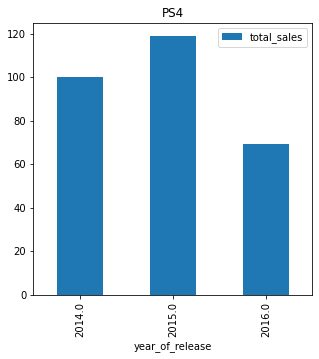

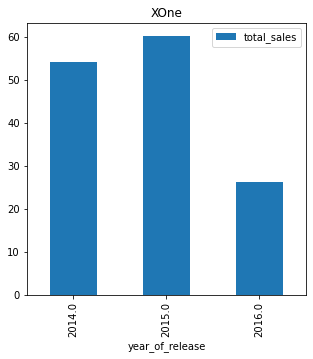

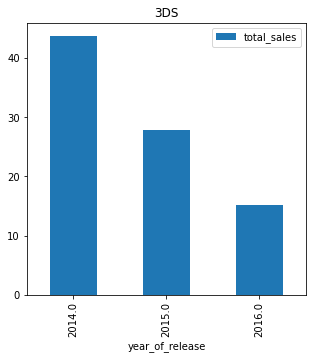

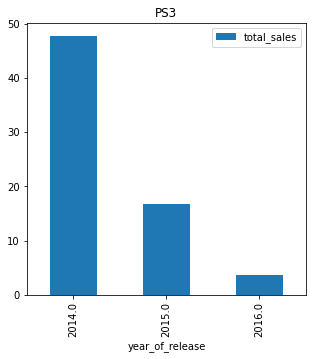

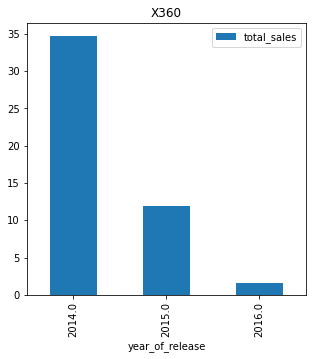

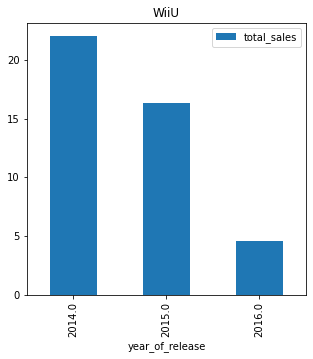

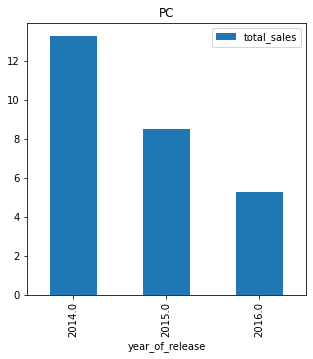

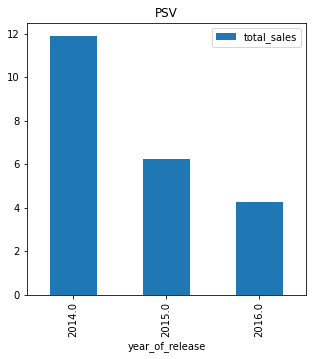

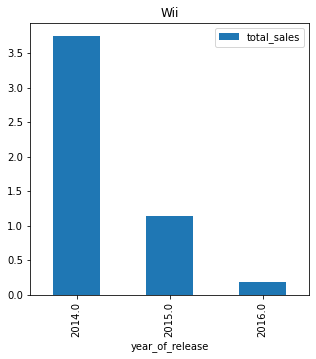

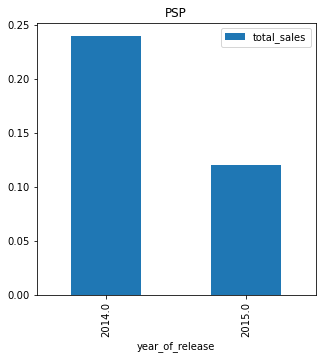

In [72]:
top_platform_list = top_platform.index
for i in top_platform_list:
    (data_actual[data_actual['platform'] == i].
     pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum').
     plot(title = i, figsize = (5,5), kind = 'bar')
    )

Какой вывод можно сделать по полученым данным:
- Несмотря на то что платформа X360 имеет наибольший общий тираж продаж, в последние годы продажи падают и платформу нельзя назвать перспективной.
- Другие платформы, продажи которых падают с годами: PS3, 3DS, Wii , DS, PC, WiiU, PSP, PSV, PS2
- Потенциально прибыльными могут быть следующие платформы: PS4, XOne

Построим график "ящика с усами" по глобальным продажам игр в разбивке по платформам (для 5 наиболее популярных):

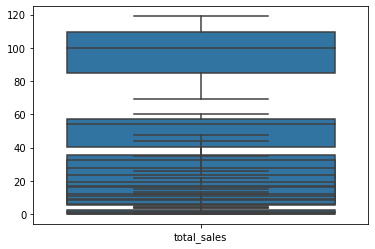

In [73]:
for i in top_platform_list:
    platform_sales = (data_actual[data_actual['platform'] == i].
                      pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')
                     )
    sb.boxplot(data = platform_sales)

Text(0, 0.5, 'Объем продаж')

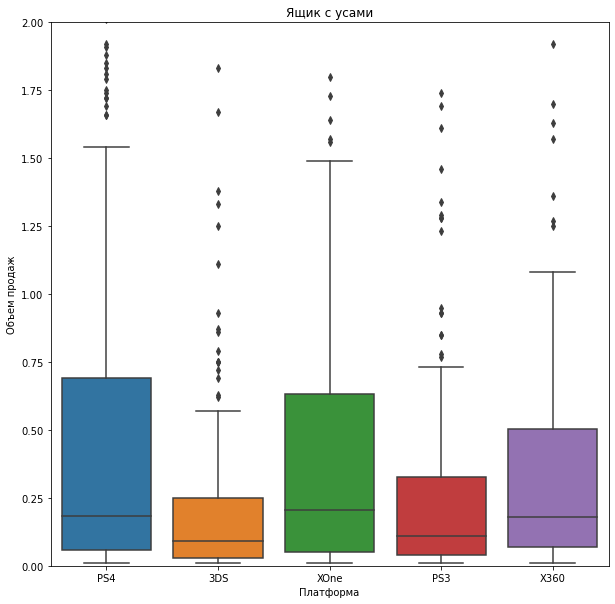

In [74]:
plt.pyplot.figure(figsize = (10,10))
top5_platform_list = top_platform.head().index
sb.boxplot(data = data_actual.query('platform in @top5_platform_list'), x = 'platform', y = 'total_sales')
plt.pyplot.ylim(0,2)
plt.pyplot.title('Ящик с усами')
plt.pyplot.xlabel('Платформа')
plt.pyplot.ylabel('Объем продаж')

Исходя из полученных графиков можно сделать несколько выводов:
- У платформы PS4 наибольшее количество продаж, далее идет XOne и X360
- Медиана для каждой платформы расположена по разному

Теперь рассмотрим влияние отзывов пользователей и критиков на продажи игр внутри платформы:

Платформа  PS4
Коэффициент корреляции для игроков: -0.040131589472697286
Коэффициент корреляции для критиков: 0.402661410681041


Платформа  XOne
Коэффициент корреляции для игроков: -0.07038392806475818
Коэффициент корреляции для критиков: 0.428676943703332


Платформа  3DS
Коэффициент корреляции для игроков: 0.2151932718527028
Коэффициент корреляции для критиков: 0.31411749286905094


Платформа  PS3
Коэффициент корреляции для игроков: -0.16676141347662105
Коэффициент корреляции для критиков: 0.44657460493190715


Платформа  X360
Коэффициент корреляции для игроков: -0.13844457094566506
Коэффициент корреляции для критиков: 0.5257228356581521




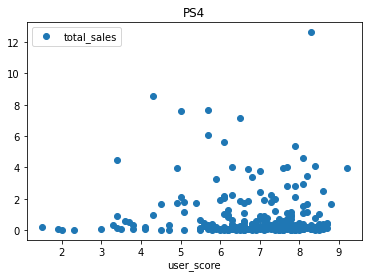

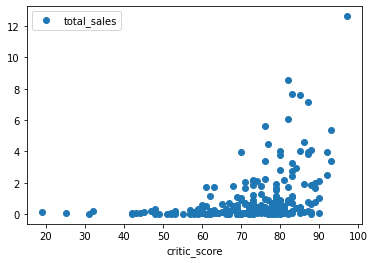

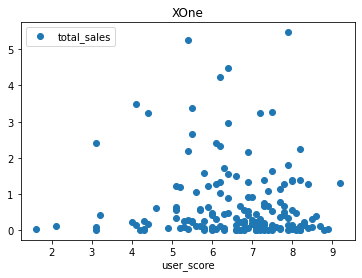

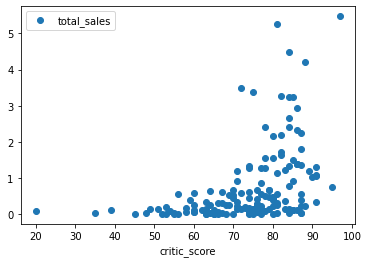

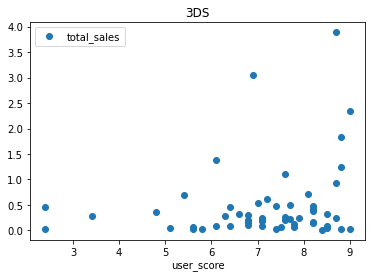

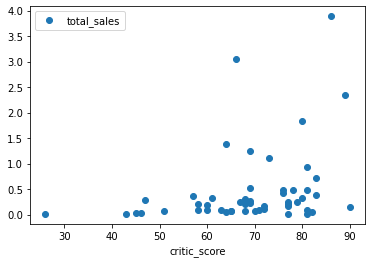

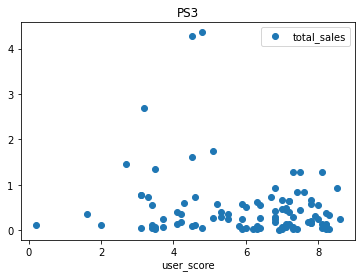

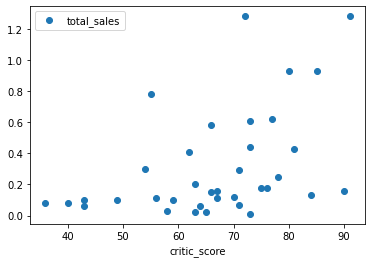

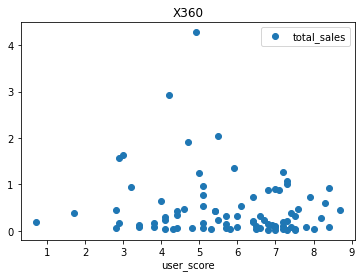

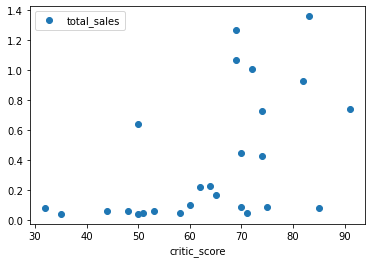

In [75]:
for i in top5_platform_list:
    print('Платформа ', i)
    (data_actual.
     query('platform == @i').
     plot(x = 'user_score' ,y = 'total_sales', style='o')
    )
    plt.pyplot.title(i)
    (data_actual.
     query('platform == @i').
     plot(x = 'critic_score' ,y = 'total_sales', style='o')
    )
    print('Коэффициент корреляции для игроков:', data_actual.query('platform == @i')['total_sales'].
          corr(data_actual.query('platform == @i')['user_score']))
    print('Коэффициент корреляции для критиков:', data_actual.query('platform == @i')['total_sales'].
          corr(data_actual.query('platform == @i')['critic_score']))
    print()
    print()

**Вывод:** Продажи на конкретной платформы почти не зависят от отзывов игроков, так как коэффициент корреляции Пирсона меньше 0.1 в большинстве случаев. А между продажами на платформе и отзывами критиков есть слабая корреляция (коэф-т в районе 0.3 - 0.4). 

**Теперь рассмотрим как распределены игры по жанрам, какие жанры самые прибыльные и выделяются ли жанры с высокими и низкими продажами.**

Text(0, 0.5, 'Количество игр')

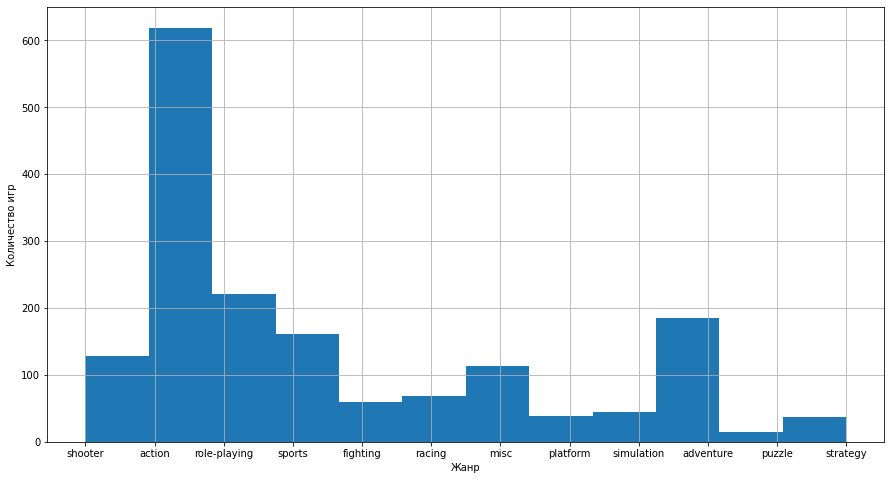

In [76]:
data_actual['genre'].hist(bins = 12, figsize = (15,8))
plt.pyplot.xlabel('Жанр')
plt.pyplot.ylabel('Количество игр')

Самый популярный жанр - экшн, наименее популярный - пазлы. Рассмотрим распределение жанров по среднему объему продаж:

Text(0, 0.5, 'Объем продаж')

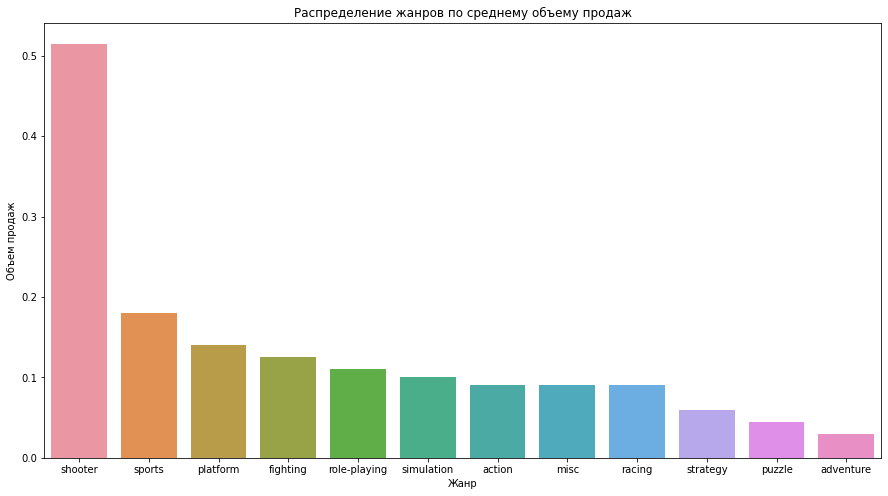

In [77]:
genre_sales = (data_actual.
               pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'median').
               sort_values(by = 'total_sales', ascending=False))


plt.pyplot.figure(figsize = (15,8))
plt.pyplot.title('Распределение жанров по среднему объему продаж')
sb.barplot(x = genre_sales.index, y = genre_sales['total_sales'])
plt.pyplot.xlabel('Жанр')
plt.pyplot.ylabel('Объем продаж')

**Вывод:** Самыми прибыльными жанрами оказались шутер, спортивные, а также платформ игры. При этом жанр шутер игр сильно выделяется среди остальных. А вот наименее прибыльные жанры (пазлы, стратегии и приключения) имеют схожие показатели.

## Портрет пользователя каждого региона

Необходимо определить для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Перед началом исследования посмотрим на все возможные значения `rating` и определим их значение:

In [78]:
data_actual['rating'].unique()

array(['unknown', 'M', 'E', 'T', 'E10+'], dtype=object)

- `E` (Everyone) - Для всех
- `M` (Mature) - Для взрослых
- `E10+` - От 10 лет и старше
- `T` (Teen) - Подросткам
- `EC` (Early childhood) - Для детей младшего возраста
- `RP` (Rating Pending) - Рейтинг ожидается

Перейдем к составлению портретов. Начать можно с платформ:

Text(0, 0.5, 'Объем продаж в регионе')

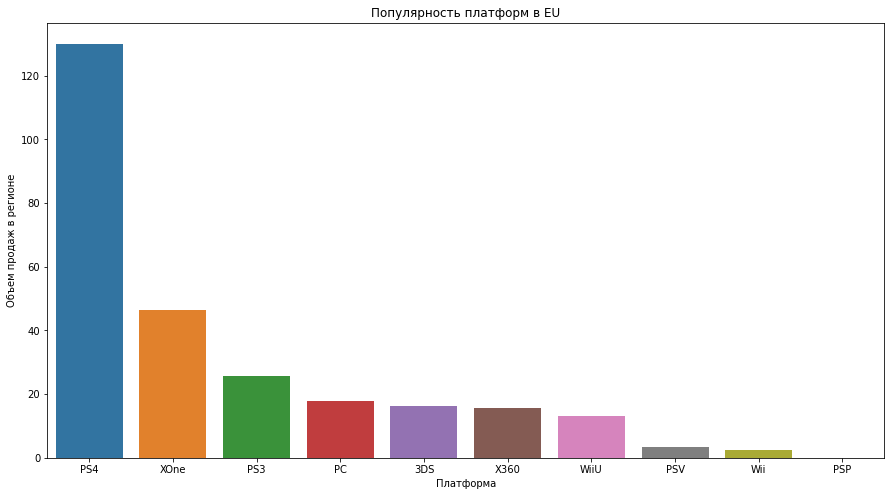

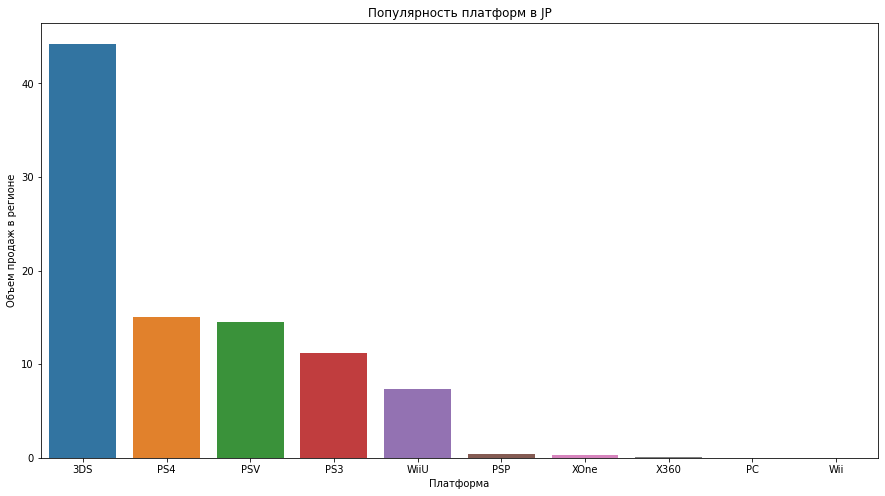

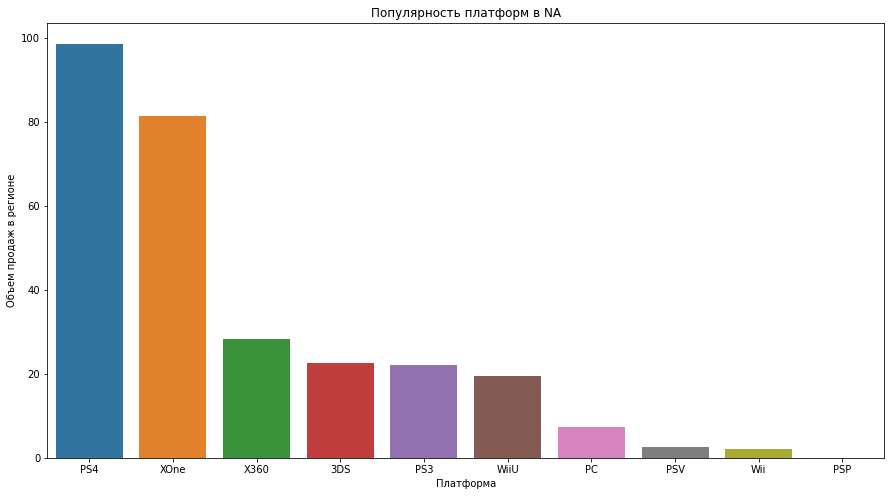

In [79]:
#платформы EU:
eu_data_platform = (data_actual.
           pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum').
           sort_values(by = 'eu_sales', ascending=False)
          )

plt.pyplot.figure(figsize = (15,8))
plt.pyplot.title('Популярность платформ в EU')
sb.barplot(x = eu_data_platform.index, y = eu_data_platform['eu_sales'])
plt.pyplot.xlabel('Платформа')
plt.pyplot.ylabel('Объем продаж в регионе')

#платформы JP:
jp_data_platform = (data_actual.
           pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum').
           sort_values(by = 'jp_sales', ascending=False)
          )

plt.pyplot.figure(figsize = (15,8))
plt.pyplot.title('Популярность платформ в JP')
sb.barplot(x = jp_data_platform.index, y = jp_data_platform['jp_sales'])
plt.pyplot.xlabel('Платформа')
plt.pyplot.ylabel('Объем продаж в регионе')

#платформы NA:
na_data_platform = (data_actual.
           pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum').
           sort_values(by = 'na_sales', ascending=False)
          )

plt.pyplot.figure(figsize = (15,8))
plt.pyplot.title('Популярность платформ в NA')
sb.barplot(x = na_data_platform.index, y = na_data_platform['na_sales'])
plt.pyplot.xlabel('Платформа')
plt.pyplot.ylabel('Объем продаж в регионе')

Перейдем к сравнению жанров:

Text(0, 0.5, 'Объем продаж в регионе')

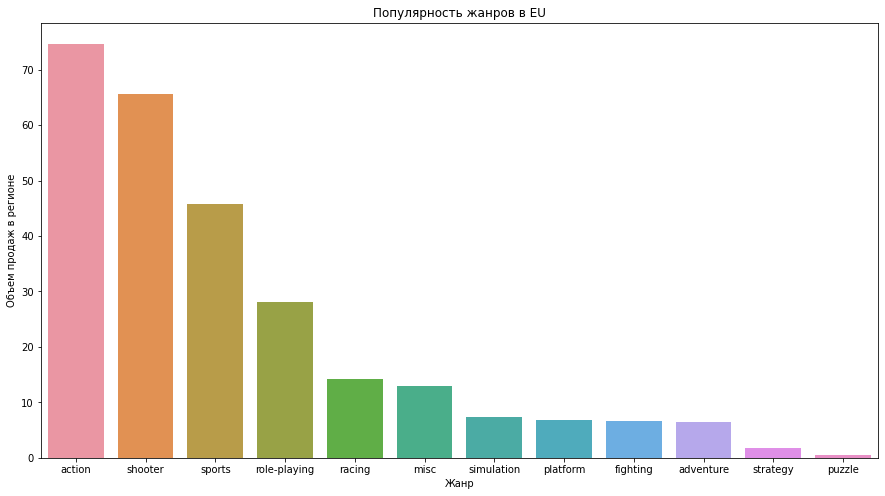

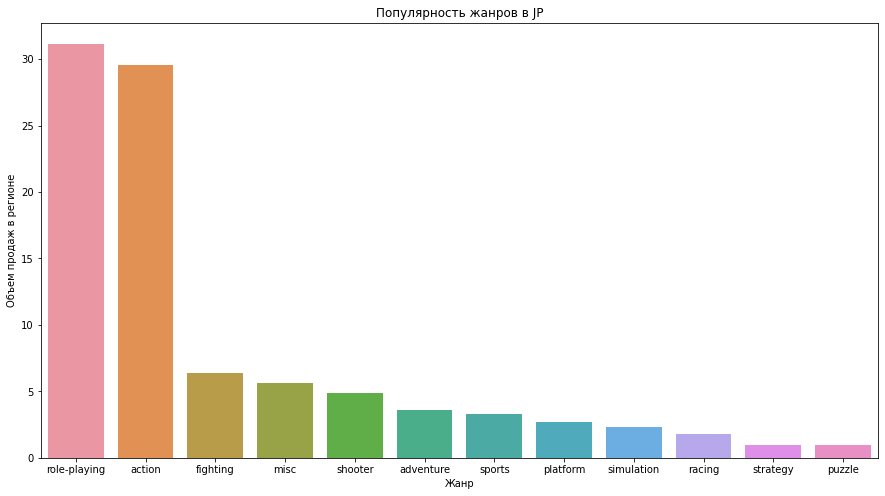

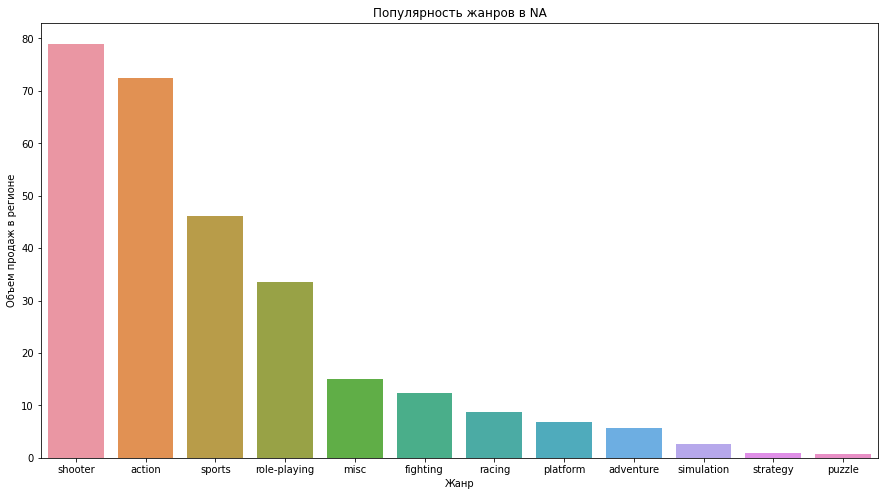

In [80]:
#жанры EU:
eu_data_genre = (data_actual.
           pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum').
           sort_values(by = 'eu_sales', ascending=False)
          )

plt.pyplot.figure(figsize = (15,8))
plt.pyplot.title('Популярность жанров в EU')
sb.barplot(x = eu_data_genre.index, y = eu_data_genre['eu_sales'])
plt.pyplot.xlabel('Жанр')
plt.pyplot.ylabel('Объем продаж в регионе')

#жанры JP:
jp_data_genre = (data_actual.
           pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum').
           sort_values(by = 'jp_sales', ascending=False)
          )

plt.pyplot.figure(figsize = (15,8))
plt.pyplot.title('Популярность жанров в JP')
sb.barplot(x = jp_data_genre.index, y = jp_data_genre['jp_sales'])
plt.pyplot.xlabel('Жанр')
plt.pyplot.ylabel('Объем продаж в регионе')

#жанры NA:
na_data_genre = (data_actual.
           pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum').
           sort_values(by = 'na_sales', ascending=False)
          )

plt.pyplot.figure(figsize = (15,8))
plt.pyplot.title('Популярность жанров в NA')
sb.barplot(x = na_data_genre.index, y = na_data_genre['na_sales'])
plt.pyplot.xlabel('Жанр')
plt.pyplot.ylabel('Объем продаж в регионе')

И наконец перейдем к сравнению рейтингов:

Text(0, 0.5, 'Объем продаж в регионе')

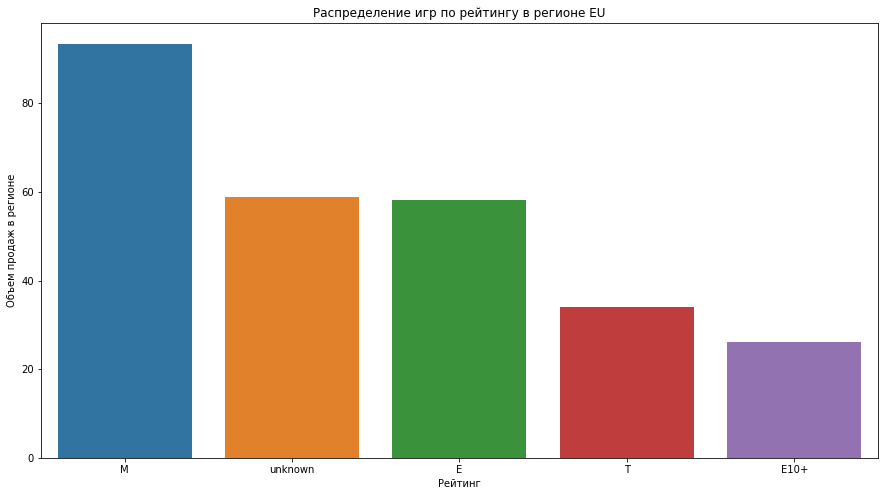

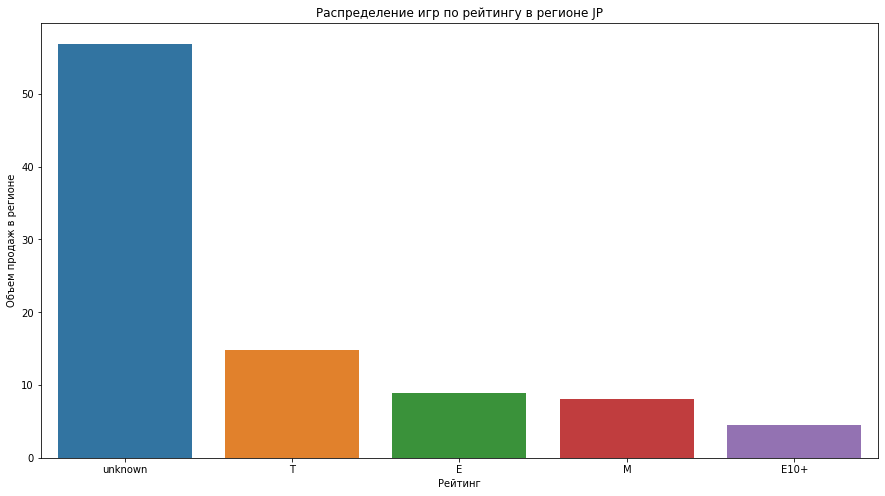

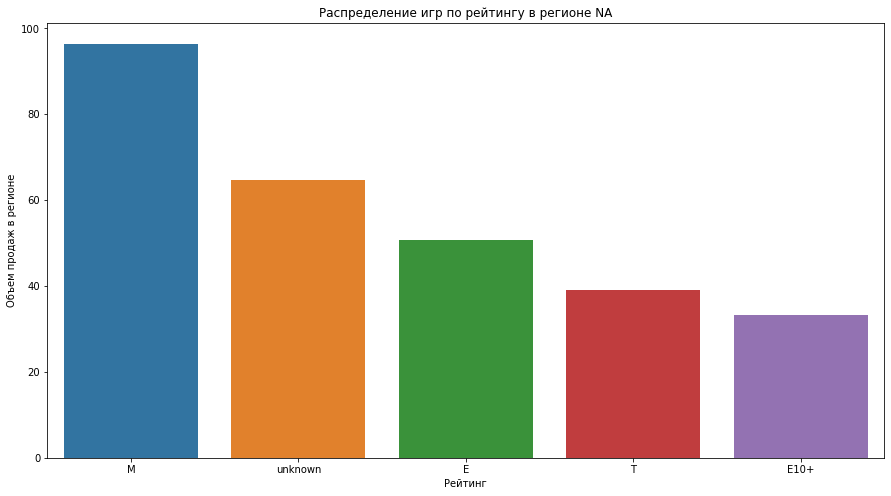

In [81]:
#рейтинг EU:
eu_data_rating = (data_actual.
           pivot_table(index = 'rating', values = 'eu_sales', aggfunc = 'sum').
           sort_values(by = 'eu_sales', ascending=False)
          )

plt.pyplot.figure(figsize = (15,8))
plt.pyplot.title('Распределение игр по рейтингу в регионе EU')
sb.barplot(x = eu_data_rating.index, y = eu_data_rating['eu_sales'])
plt.pyplot.xlabel('Рейтинг')
plt.pyplot.ylabel('Объем продаж в регионе')

#рейтинг JP:
jp_data_rating = (data_actual.
           pivot_table(index = 'rating', values = 'jp_sales', aggfunc = 'sum').
           sort_values(by = 'jp_sales', ascending=False)
          )

plt.pyplot.figure(figsize = (15,8))
plt.pyplot.title('Распределение игр по рейтингу в регионе JP')
sb.barplot(x = jp_data_rating.index, y = jp_data_rating['jp_sales'])
plt.pyplot.xlabel('Рейтинг')
plt.pyplot.ylabel('Объем продаж в регионе')

#рейтинг NA:
na_data_rating = (data_actual.
           pivot_table(index = 'rating', values = 'na_sales', aggfunc = 'sum').
           sort_values(by = 'na_sales', ascending=False)
          )

plt.pyplot.figure(figsize = (15,8))
plt.pyplot.title('Распределение игр по рейтингу в регионе NA')
sb.barplot(x = na_data_rating.index, y = na_data_rating['na_sales'])
plt.pyplot.xlabel('Рейтинг')
plt.pyplot.ylabel('Объем продаж в регионе')

Таким образом, получили следующие портреты пользователей:

**EU регион**
- 5 наиболее популярных платформ в EU регионе: ***PS4, XOne, PS3, PC. 3DS***. Стоит отметить что PS4 лидирует с огромным отрывом. Разница с ближайшим конкурентом XOne - почти в 3 раза.
- 5 наиболее популярных жанров - ***action, shooter, sports, role-playing, racing***. С жанрами аналогичная ситуация - экшн игры и шутеры сильно выделяются. Однако дальше идет равномерное уменьшение популярности жанров.
- Топ-рейтингов - "Для взрослых" и "Для всех", игры без рейтинга вторые по популярности

**JP регион**
- 5 наиболее популярных платформ в JP регионе: ***3DS, PS4, PSV, PS3, WiiU***
- 5 наиболее популярных жанров в JP регионе: ***role_playing, action, fighting, misc, shooter***
- Топ-рейтингов - "Для всех" и "Подросткам. При этом большая часть игр рейтинга не имеет.

Ситуация в японском регионе совершенно отличается от европейского. Тут на первом месте стоит платформа 3DS, чья доля почти в 3 раза больше чем у ближайшего конкурента - PS4. При этом популярные в Европе XOne и PS3 пользуются очень низкой популярностью. Это можно объяснить тем что компания Nintendo, производящая 3DS как раз располагается в Японии и ориентируется в первую очередь на жителей своего региона. Отсюда консоли (и соответственно игры компании выходящие на них) намного популярнее чем все остальные платформы и жанры. Даже DS которая в Европе занимает 8 место по популярности располагается в Японии на 4 месте. По жанрам ситуация тоже кардинально отличается - японцев в основном интересуют ролевые игры, чуть менее популярны экшн игры. Все остальные жанры имеют схожую низкую популярность. При этом можно отметить, что самые популярные платформы - портативные консоли (3DS и DS, PSP и PSV). Также возрастной рейтинг большей части игр отличаются - японцы больше предпочитают игры "Для всех".

**NA регион**
- 5 наиболее популярных платформ в NA регионе: ***PS4, XOne, X360, 3DS, PS3***
- 5 наиболее популярных жанров в NA регионе: ***shooter, action, sports, role-playing, misc***
- Топ-рейтингов - "Для взрослых" и "Для всех", игры без рейтинга на 2м месте по популярности.

А вот NA регион очень схож с EU регионом. Все так же PS4 наиболее популярна, XOne на втором месте. Платформа PC имеет значительно меньшую популярность чем в Европе. Это опять же можно оправдать тем что Microsoft - компания, производящая консоли X360 и XOne находится в Америке. По жанрам же почти полное совпадение - из значимых лишь шутеры и экшн поменялись местами в рейтинге. Возрастной рейтинг полностью идентичен по распределению.



**Вывод:** 

Пользователи из NA и EU регионов во многом схожи между собой. Небольшие отличия присутствуют лишь в популярных платформах, распределение по рейтингу игр абсолютно одинаковое. А вот пользователи из JP региона сильно отличаются - при чем как в выборе платформы,так и в жанрах игр, в рейтинге. Подавляющее большинство японцев играют в ролевые игры, чуть поменьше - в экшн, а остальные жанры им почти не интересны. И самые популярные консоли от производителей которые также располагаются в Японии - Nintendo и Sony. При этом пользователи из Японии предпочитают игры с возрастным ограничением "Для всех", в то время как в Америке и Европе больше любят игры "Для взрослых".

## Проверка гипотез

Необходимо проверить 2 гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Начнем с первой: 
- **Ho** - "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые".
Сформулируем альтернативную двустороннюю гипотезу: 
- **H1** - "Средние пользовательские рейтинги платформ Xbox One и PC не равны".

Попробуем опровергнуть гипотезу:

In [82]:
xone_data = data_actual[data_actual['platform']=='XOne']['user_score']
pc_data = data_actual[data_actual['platform']=='PC']['user_score']

alpha = 0.01

results = st.ttest_ind(xone_data.dropna(), pc_data.dropna(), equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


Выполним проверку:

In [83]:
print('Средний пользовательский рейтинг на платформе XOne:', xone_data.mean())
print('Средний пользовательский рейтинг на платформе PC:', pc_data.mean())

Средний пользовательский рейтинг на платформе XOne: 6.594545454545453
Средний пользовательский рейтинг на платформе PC: 6.298360655737703


И правда, значения отличаются всего на одну сотую

Теперь вторая гипотеза. В данном случае удобнее будет установить нулевой гипотезой совпадений средних рейтингов, а альтернативной - различие. В случае если сможем отвергнуть нулевую гипотезу, можно будет утверждать что гипотеза "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные." верна.

- **Ho** - "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») равны.".
Сформулируем альтернативную двустороннюю гипотезу: 
- **H1** - "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные".

Приступим к расчету:

In [84]:
data_action = data_actual[data_actual['genre']=='action']['user_score']
data_sports = data_actual[data_actual['genre']=='sports']['user_score']

alpha = .01

results = st.ttest_ind(data_action.dropna(), data_sports.dropna(), equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


Выполним проверку:

In [85]:
print('Средний пользовательский рейтинг в жанре Экшн:', data_action.mean())
print('Средний пользовательский рейтинг в жанре Спорт:', data_sports.mean())

Средний пользовательский рейтинг в жанре Экшн: 6.760606060606054
Средний пользовательский рейтинг в жанре Спорт: 5.225196850393697


Значит гипотеза "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») равны" опровергнута

**Вывод:**

Первая гипотеза не была опровергнута, а альтернативная гипотеза для второй была опровергнута.

## Общий вывод

Было проведено исследование рынка игр за актуальный период с 2010 по 2016 год. Обусловлен период тем, что он отражает поведение рынка лучше чем все предыдущие года (после 2010 года произошел спад из за появления мобильных игр, а до 2000го игр было очень мало). При изучении данных были выделены две потенциально прибыльные платформы - PS4, Xbox One.

Также было изучено влияние отзывов игроков и критиков на продажи внутри платформы. Выявлено, что корреляция между продажами и отзывами игроков отсутствует, а корреляция между продажами и отзывами критиков слабая (коэф-т Пирсона ~[0.3;0.4])

Анализ игр различных жанров показал, что наиболее популярные и прибыльные жанры - `action`, `shooter` и `role-play`.

В процессе исследования были также составлены портреты пользователя каждого региона: 

**EU регион**
- 5 наиболее популярных платформ в EU регионе: ***PS4, XOne, PS3, PC. 3DS***. Стоит отметить что PS4 лидирует с огромным отрывом. Разница с ближайшим конкурентом XOne - почти в 3 раза.
- 5 наиболее популярных жанров - ***action, shooter, sports, role-playing, racing***. С жанрами аналогичная ситуация - экшн игры и шутеры сильно выделяются. Однако дальше идет равномерное уменьшение популярности жанров.
- Топ-рейтингов - "Для взрослых" и "Для всех", игры без рейтинга вторые по популярности

**JP регион**
- 5 наиболее популярных платформ в JP регионе: ***3DS, PS4, PSV, PS3, WiiU***
- 5 наиболее популярных жанров в JP регионе: ***role_playing, action, fighting, misc, shooter***
- Топ-рейтингов - "Для всех" и "Подросткам. При этом большая часть игр рейтинга не имеет.

**NA регион**
- 5 наиболее популярных платформ в NA регионе: ***PS4, XOne, X360, 3DS, PS3***
- 5 наиболее популярных жанров в NA регионе: ***shooter, action, sports, role-playing, misc***
- Топ-рейтингов - "Для взрослых" и "Для всех", игры без рейтинга на 2м месте по популярности.

И проверены две гипотезы: 

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые - **гипотезу не удалось опровергнуть**
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») равны - **гипотеза опровергнута**